
## Brain Tumor Classification Investigation Overview

### Dataset:
- The dataset used for this investigation is the **Brain Tumor MRI Dataset** from Kaggle.
- It comprises a curated collection of brain MRI scans specifically selected to facilitate research in automated brain tumor detection and classification using Keras library.
- The dataset focuses on improving diagnostic accuracy and includes a randomized subset of 20% of the original data, categorized into 'yes' (tumor present) and 'no' (healthy) tumor classes for both training and validation⁵⁶.

### Methods Explored:

1. **VGG16 + FC (VGG16 with Fully Connected Layers)**:
   - VGG16 is a deep CNN architecture with 16 weight layers.
   - Pre-trained on the ImageNet dataset.
   - Additional fully connected layers are added for classification.

2. **VGG + CNN2D (VGG16 with Additional Convolutional Layers)**:
   - Extends VGG16 by adding more convolutional layers for feature extraction.

3. **ResNet50 + FC (ResNet50 with Fully Connected Layers)**:
   - ResNet50 is a deep residual network with 50 layers.
   - Addresses vanishing gradient problem using skip connections.
   - Fully connected layers are added for classification.

4 **ResNet50 + CNN2D (ResNet50 with Additional Convolutional Layers)**:
   - Enhances ResNet50 by incorporating more convolutional layers.

5. **ViT (Vision Transformer) + FC (Fully Connected Layers)**:
   - ViT is a transformer-based architecture originally designed for natural language processing.
   - Adapted for image classification by treating images as sequences of patches.
   - Fully connected layers added for classification⁷.

### Investigation Goals:
- Investigate the effectiveness of transfer learning using pre-trained models (VGG16, ResNet50, and ViT) for brain tumor classification.
- Compare the performance of different architectures in terms of accuracy, sensitivity, specificity, and other relevant metrics.
- Understand how transfer learning impacts model convergence, generalization, and robustness.

Overall, this investigation aims to contribute insights into brain tumor classification using state-of-the-art deep learning methods and evaluate their performance on the provided dataset. Researchers and practitioners can use these findings to enhance diagnostic accuracy and improve patient outcomes in clinical settings. 😊

Source: Conversation with Bing, 4/7/2024
(1) Brain Tumor MRI Dataset | Kaggle. https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset.
(2) Brain_Tumor_MRI_Datasets | Kaggle. https://www.kaggle.com/datasets/luluw8071/brain-tumor-mri-datasets.
(3) Brain tumors 256x256 | Kaggle. https://www.kaggle.com/datasets/thomasdubail/brain-tumors-256x256.
(4) Brian Tumor Dataset | Kaggle. https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset.
(5) Kaggle: Your Home for Data Science. https://www.kaggle.com/datasets/preetviradiya/brian-tumor-dataset/download.
(6) Effective Brain Tumor Image Classification using Deep Learning - Springer. https://link.springer.com/article/10.1007/s40009-023-01309-9.
(7) Brain_tumor using Vision Transformer | Kaggle. https://www.kaggle.com/code/numanshabbir/brain-tumor-using-vision-transformer.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammadlabbaf","key":"87d10deeee3a090e63fbcf7f8143eef5"}'}

In [2]:
!pip install kaggle
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d preetviradiya/brian-tumor-dataset

 90% 97.0M/107M [00:01<00:00, 66.1MB/s]
100% 107M/107M [00:01<00:00, 67.4MB/s] 


In [3]:
!pip install split-folders
!pip install torch-summary

In [4]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='darkgrid')
import copy # A module that provides functions for creating copies of objects, useful for avoiding unintended modifications to variables.
from PIL import Image # A module from the Python Imaging Library (PIL) that provides functionality for opening, manipulating, and saving various image file formats.
import os
import numpy as np
import tensorflow as tf
import random as python_random
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.initializers import Constant

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix, classification_report
import itertools # This import statement imports the itertools module, which provides functions for efficient looping and combining of iterables. It can be used for tasks such as generating combinations or permutations of elements.
from tqdm.notebook import trange, tqdm # These functions allow for the creation of progress bars to track the progress of loops or tasks.
import warnings
warnings.filterwarnings('ignore')

In [5]:
!unzip brian-tumor-dataset.zip

Archive:  brian-tumor-dataset.zip
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: Brain Tumo

In [6]:
labels_df = pd.read_csv('/content/metadata.csv')
labels_df

,Unnamed: 0,image,class,format,mode,shape
0,0,Cancer (1).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
1,1,Cancer (1).png,tumor,PNG,L,"(300, 240)"
2,2,Cancer (1).tif,tumor,TIFF,RGB,"(256, 256, 3)"
3,3,Cancer (10).jpg,tumor,JPEG,RGB,"(512, 512, 3)"
4,4,Cancer (10).tif,tumor,TIFF,RGB,"(256, 256, 3)"
...,...,...,...,...,...,...
4595,4595,Not Cancer (995).jpg,normal,JPEG,RGB,"(168, 300, 3)"
4596,4596,Not Cancer (996).jpg,normal,JPEG,RGB,"(509, 452, 3)"
4597,4597,Not Cancer (997).jpg,normal,JPEG,RGB,"(197, 177, 3)"
4598,4598,Not Cancer (998).jpg,normal,JPEG,RGB,"(217, 232, 3)"


# Load Data


This script is used for loading and preprocessing a dataset of brain images for a binary classification task. The dataset consists of images of brains with tumors and healthy brains.

The script begins by importing the necessary libraries and defining the paths to the directories containing the images.

An ImageDataGenerator is then created for data augmentation, which is a technique used to increase the amount of data by creating augmented versions of the images in the dataset. The images are also rescaled to make the model easier to train.

The images are loaded from the directories and data augmentation is applied. The images are resized to 256x256 pixels and are loaded in batches of 32. They are labeled as binary (0 or 1) for the classification task. The 'subset' argument is used to divide the dataset into training and validation sets.

The script then prints the numerical labels assigned to each class ('Brain Tumor' and 'Healthy'), a success message indicating that the data has been loaded successfully, and the number of samples in the training and validation sets. This gives an idea of the size of the dataset and the distribution of samples in both the training and validation sets.

The output of the script shows that the data was loaded successfully, and provides information about the number of samples in the training and validation sets, as well as the distribution of samples in both sets. This information is crucial for understanding the composition of the dataset and ensuring that the model is trained on a representative sample of data.

In summary, this script is a crucial first step in the process of training a machine learning model for brain tumor detection. It ensures that the data is properly loaded and preprocessed, and provides important information about the dataset. This allows for more effective model training and ultimately, more accurate predictions.

In [7]:
# Set the random state for numpy, tensorflow and python random
np.random.seed(43)
tf.random.set_seed(43)
python_random.seed(43)

# Define the paths to the dataset directories
brain_tumor_dir = '/content/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor'
healthy_dir = '/content/Brain Tumor Data Set/Brain Tumor Data Set/Healthy'

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the images from the directories and apply data augmentation
train_generator = datagen.flow_from_directory(
    '/content/Brain Tumor Data Set/Brain Tumor Data Set',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/Brain Tumor Data Set/Brain Tumor Data Set',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Print the class indices
print(f"Class indices: {train_generator.class_indices}")

# Print a success message
print("Data loaded successfully for brain tumor classification.")

# Print the number of samples in the training and validation sets
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {validation_generator.samples}")

# Print the number of training samples for the first and second class
print(f"Number of training samples for the first class: {sum(train_generator.classes == 0)}")
print(f"Number of training samples for the second class: {sum(train_generator.classes == 1)}")

# Print the number of validation  samples for the first and second class
print(f"Number of validation  samples for the first class: {sum(validation_generator.classes == 0)}")
print(f"Number of validation  samples for the second class: {sum(validation_generator.classes == 1)}")


Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.
Class indices: {'Brain Tumor': 0, 'Healthy': 1}
Data loaded successfully for brain tumor classification.
Number of training samples: 3681
Number of validation samples: 919
Number of training samples for the first class: 2011
Number of training samples for the second class: 1670
Number of validation  samples for the first class: 502
Number of validation  samples for the second class: 417


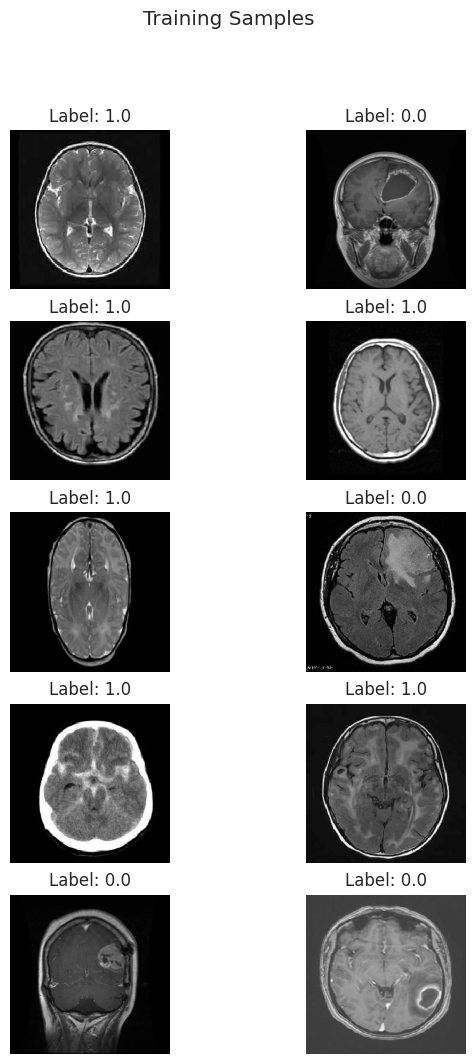

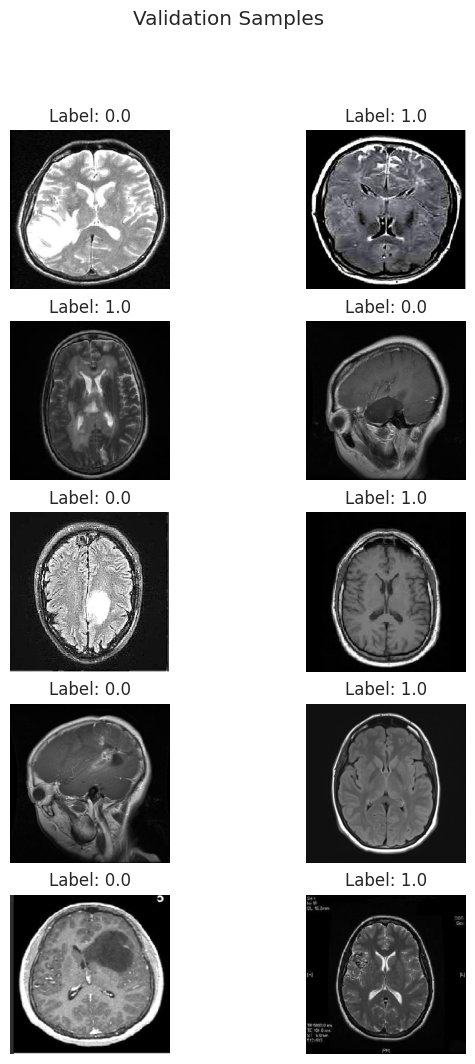

In [8]:
# Function to plot images and their labels
def plot_images(images, labels, title):
    plt.figure(figsize=(7, 12))
    for i in range(10):
        plt.subplot(5, 2, i+1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Code to plot ten samples from the training set
for i, (images, labels) in enumerate(train_generator):
    if i == 1:
        plot_images(images, labels, "Training Samples")
        break

# Code to plot ten samples from the validation set
for i, (images, labels) in enumerate(validation_generator):
    if i == 1:
        plot_images(images, labels, "Validation Samples")
        break


In [29]:
def train_and_plot(model, train_generator, validation_generator, epochs=1, batch_size=256):
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    # Train the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size
    )

    # Plot the training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return history

# Transfer Learning

**Transfer learning** is a powerful technique in machine learning where knowledge gained from solving one task is leveraged to improve performance on a related task. Imagine training a model to recognize cars, and then using that knowledge to enhance its ability to identify trucks. By reusing information from previously learned tasks, transfer learning significantly improves learning efficiency and generalization. It allows models to build upon existing knowledge, making it especially valuable when data is limited or when tasks share similarities. The concept of transfer learning has applications in various domains, including image classification, text analysis, and medical imaging.

**VGG16**, short for the Visual Geometry Group 16, is a deep convolutional neural network model that gained prominence after winning the **ImageNet Large Scale Visual Recognition Challenge** in 2014. Developed by Karen Simonyan and Andrew Zisserman from the University of Oxford, VGG16 is characterized by its simplicity and effectiveness. It consists of a total of **16 layers**, including **13 convolutional layers** and **3 fully connected layers**. The model's architecture features a stack of convolutional layers followed by max-pooling layers, progressively increasing in depth. Despite its straightforward design, VGG16 achieves remarkable performance on various computer vision tasks, such as **image classification** and **object recognition**. Notably, it achieved a top-5 test accuracy of **92.7%** on the **ImageNet dataset**, which contains over 14 million images across 1000 classes. Its versatility and robustness continue to make it a popular choice in deep learning applications.



**ResNet50**, short for the Visual Geometry Group 50, is a deep convolutional neural network (CNN) architecture that gained prominence after its introduction by Microsoft Research in 2015. As a variant of the popular ResNet architecture (which stands for "Residual Network"), ResNet50 is specifically designed to address the vanishing gradient problem encountered in very deep neural networks. The "50" in its name refers to the number of layers in the network, making it a 50-layer deep model. ResNet50 incorporates a unique design feature called **shortcut connections** or **skip connections**, which allow information to flow directly across layers without being significantly altered. These skip connections enable the training of extremely deep networks by mitigating the degradation of performance as the network depth increases. ResNet50 has been widely used for various computer vision tasks, including image classification, object detection, and feature extraction, achieving state-of-the-art results on benchmark datasets such as ImageNet.

1. **Importing Necessary Modules**:
   - The snippet begins by importing essential modules from TensorFlow and Keras.
   - Specifically, it imports the `VGG16` and `ResNet50` pre-trained models and the `Model` class.

2. **Loading Pre-trained VGG16 and ResNet50 Models**:
   - The `VGG16` and `ResNet50` models are well-known deep convolutional neural networks (CNNs) that have been pre-trained on a large dataset (specifically, the ImageNet dataset).
   - The `VGG16` model is loaded with pre-trained weights from the "imagenet" dataset. The `include_top=False` argument ensures that the fully connected layers (top layers) are not included.
   - Similarly, the `ResNet50` model is loaded with pre-trained weights and excludes the top layers.

3. **Freezing Layers**:
   - To use these pre-trained models as feature extractors, we set their layers to be non-trainable (frozen).
   - The `for` loops iterate through the layers of both models and set their `trainable` attribute to `False`.
   - By doing this, we prevent the weights of these layers from being updated during subsequent training.

4. **Purpose**:
   - The purpose of this code snippet is to load the pre-trained VGG16 and ResNet50 models, excluding their top layers, and ensure that their weights remain fixed during further training or feature extraction.
   - These models can then be used as feature extractors for downstream tasks, such as transfer learning or fine-tuning on a specific dataset.



In [12]:
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model without the top layer (which includes fully connected layers)
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Make sure the layers of VGG16 and ResNet50 are not trainable
for layer in vgg16.layers:
    layer.trainable = False

for layer in resnet50.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


# ResNet50 + FC


1. **Custom Model Architecture Based on ResNet50**:
   - The snippet defines a new neural network architecture by building upon the pre-trained **ResNet50** model.
   - The goal is to create a custom model for binary classification (e.g., distinguishing between two classes).

2. **Model Architecture**:
   - The custom architecture starts with the output of the pre-trained ResNet50 model.
   - The `Flatten()` layer converts the 3D feature maps into a 1D vector.
   - Next, a **fully connected layer** with **128 neurons** and **ReLU activation** is added.
   - Finally, a **single neuron** with **sigmoid activation** is used for binary classification (e.g., classifying an image as positive or negative).

3. **Creating the New Model**:
   - The `Model` class is used to create a new model.
   - The input to this model is the same as the input to the pre-trained ResNet50 model (`resnet50.input`).
   - The output is the custom architecture defined above (`x`).

4. **Training the New Model**:
   - The `train_and_plot` function is called to train the new model using the provided data generators (`train_generator` and `validation_generator`).
   - The training process includes **10 epochs** and a **batch size of 64**.

5. **Purpose**:
   - The purpose of this code snippet is to create a custom neural network architecture based on the ResNet50 backbone and train it on brain tumor data for binary classification.
   - The resulting model (`model_resnet50`) can be further evaluated and fine-tuned for brain tumor detection.



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

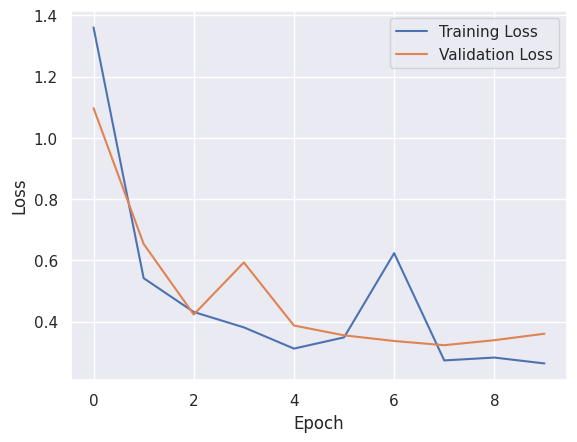

In [13]:
# Define your own model architecture
x = Flatten()(resnet50.output)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create a new model
model_resnet50 = Model(inputs=resnet50.input, outputs=x)

train_and_plot(model_resnet50, train_generator, validation_generator, epochs=10, batch_size=64)


# ResNet50 + CNN2D


1. **Custom Model Architecture Based on ResNet50**:
   - The snippet defines a new neural network architecture by building upon the pre-trained **ResNet50** model.
   - The goal is to create a custom model for binary classification (e.g., distinguishing between two classes).

2. **Model Architecture**:
   - The custom architecture starts with the output of the pre-trained ResNet50 model.
   - Two additional **Conv2D layers** are added to further process the features extracted by ResNet50.
   - The first Conv2D layer has **64 filters** and uses the **ReLU activation** function.
   - The second Conv2D layer has **128 filters** and also uses the **ReLU activation** function.
   - After the convolutional layers, a **Flatten layer** converts the 3D feature maps into a 1D vector.
   - Next, a **fully connected layer** with **128 neurons** and **ReLU activation** is added.
   - Finally, a **single neuron** with **sigmoid activation** is used for binary classification (e.g., classifying an image as positive or negative).



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

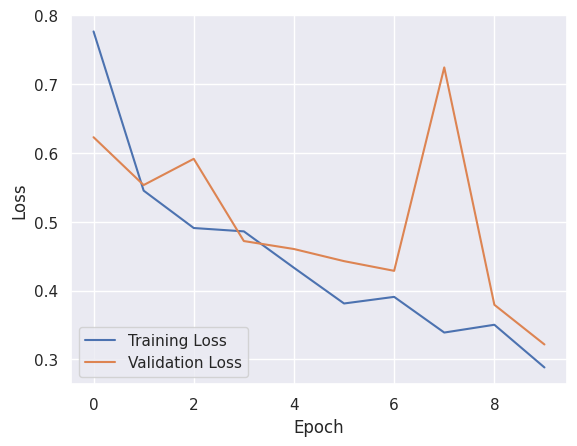

In [14]:
# Define your own model architecture
x = (resnet50.output)
# Add some Conv2D layers
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create a new model
model_resnet50_2 = Model(inputs=resnet50.input, outputs=x)

train_and_plot(model_resnet50_2, train_generator, validation_generator, epochs=10, batch_size=64)


# VGG16 + FC

1. **Custom Model Architecture Based on VGG16**:
   - The snippet defines a new neural network architecture by building upon the pre-trained **VGG16** model.
   - The goal is to create a custom model for binary classification (e.g., distinguishing between two classes).

2. **Model Architecture**:
   - The custom architecture starts with the output of the pre-trained VGG16 model.
   - The `Flatten()` layer converts the 3D feature maps into a 1D vector.
   - Next, a **fully connected layer** with **128 neurons** and **ReLU activation** is added.
   - Finally, a **single neuron** with **sigmoid activation** is used for binary classification (e.g., classifying an image as positive or negative).



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

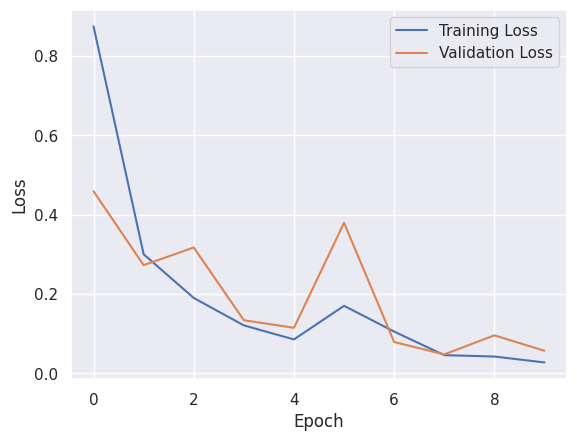

In [15]:
# Define your own model architecture
x = Flatten()(vgg16.output)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create a new model
model_vgg16 = Model(inputs=vgg16.input, outputs=x)

train_and_plot(model_vgg16, train_generator, validation_generator, epochs=10, batch_size=64)


# VGG16 + CNN2D



The provided code snippet defines a custom neural network architecture based on the pre-trained VGG16 model. The goal is binary classification, such as distinguishing between two classes (e.g., positive or negative). The architecture includes additional Conv2D layers for feature extraction, followed by a flattened layer and fully connected layers. The resulting model (`model_vgg16_2`) can be trained and evaluated for brain tumor detection using the provided data generators. Feel free to customize this architecture further for your specific task! 😊

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

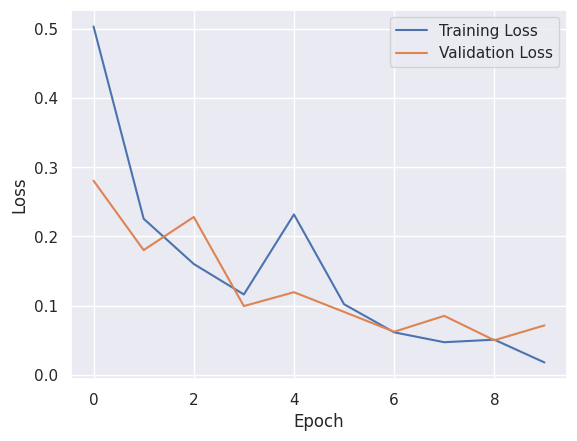

In [16]:
# Define your own model architecture
x = vgg16.output

# Add some Conv2D layers
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create a new model
model_vgg16_2 = Model(inputs=vgg16.input, outputs=x)

train_and_plot(model_vgg16_2, train_generator, validation_generator, epochs=10, batch_size=64)


# vit_b32 + FC

Certainly! Let me describe the purpose of the provided code snippet:

1. **Custom Model Architecture Based on Vision Transformer (ViT)**:
   - The snippet aims to create a custom neural network architecture by leveraging the pre-trained **Vision Transformer (ViT)** model.
   - The goal is binary classification, such as distinguishing between two classes (e.g., positive or negative).

2. **Loading Pre-trained ViT Model**:
   - The `vit_keras` library provides a pre-trained ViT model (`vit_b32`).
   - The snippet loads this model with specific configurations, including the image size, activation function, and excluding the top layers.

3. **Freezing Layers**:
   - To use the pre-trained ViT model as a feature extractor, the snippet ensures that all layers are non-trainable (frozen).
   - The `for` loop iterates through the layers and sets their `trainable` attribute to `False`.

4. **Custom Architecture**:
   - The custom architecture starts with the output of the pre-trained ViT model.
   - The `Flatten()` layer converts the 3D feature maps into a 1D vector.
   - Next, a **fully connected layer** with **128 neurons** and **ReLU activation** is added.
   - Finally, a **single neuron** with **sigmoid activation** is used for binary classification.

5. **Creating the New Model**:
   - The `Model` class is used to create a new model.
   - The input to this model is the same as the input to the pre-trained ViT model (`vit_model.input`).
   - The output is the custom architecture defined above (`x`).

6. **Training the New Model**:
   - The `train_and_plot` function is called to train the new model using the provided data generators (`train_generator` and `validation_generator`).
   - The training process includes **10 epochs** and a **batch size of 64**.

7. **Purpose**:
   - The purpose of this code snippet is to create a custom neural network architecture based on the ViT backbone and train it on brain tumor data for binary classification.
   - The resulting model (`model_vit`) can be further evaluated and fine-tuned for brain tumor detection.


In [17]:
!pip install vit_keras
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.5 MB/s eta 0:00:00


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 8, 8, 768)         2360064   
                                                                 
 reshape_1 (Reshape)         (None, 64, 768)           0         
                                                                 
 class_token (ClassToken)    (None, 65, 768)           768       
                                                                 
 Transformer/posembed_input  (None, 65, 768)           49920     
  (AddPositionEmbs)                                              
                                                                 
 Transformer/encoderblock_0  ((None, 65, 768),         7087872   
  (TransformerBlock)          (None, 12, None, None)       

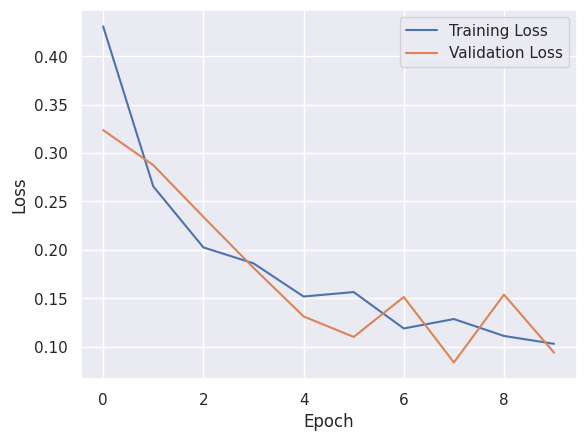

In [19]:
from vit_keras import vit
from tensorflow.keras.models import Model

# Load pre-trained Vision Transformer model
vit_model = vit.vit_b32(
    image_size = 256,
    activation = 'sigmoid',
    pretrained = True,
    include_top = False,
    pretrained_top = False,
)

# Make sure the layers of the Vision Transformer model are not trainable
for layer in vit_model.layers:
    layer.trainable = False

# Define your own model architecture
x = Flatten()(vit_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

# Create a new model
model_vit = Model(inputs=vit_model.input, outputs=x)
train_and_plot(model_vit, train_generator, validation_generator, epochs=10, batch_size=64)
